STEP 1 - Climate Analysis and Exploration

In [28]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [30]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [31]:
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [32]:
session = Session(engine)

In [33]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [34]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [35]:
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [36]:
one_year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_prior)

2016-08-23


Precipitation Analysis

In [37]:
precip_data = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > one_year_prior).\
    order_by(Measurements.date).all()

#save as dataframe and set index to date 
precip_data_df = pd.DataFrame(precip_data)
precip_data_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


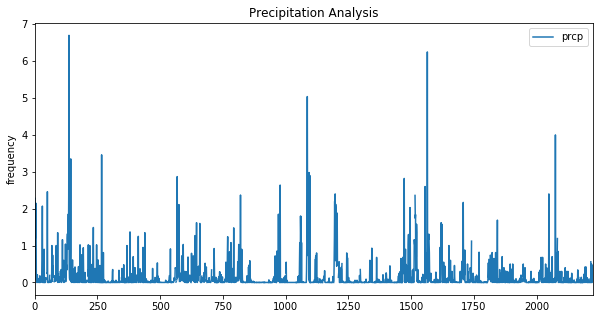

In [38]:
ax = precip_data_df.plot(figsize=(10,5))
ax.set_title("Precipitation Analysis")
ax.set_ylabel('frequency')
plt.show()

In [39]:
precip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Station Analysis

In [40]:
locs = session.query(Measurements).group_by(Measurements.station).count()
print("There are {} stations available!".format(locs))


There are 9 stations available!


In [41]:
active = session.query(Measurements.station, \
                       func.count(Measurements.station).\
                       label('count')).group_by(Measurements.station).all()
active

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [42]:
most_active = session.query(Measurements.station, \
                            func.count(Measurements.station).\
                            label('count')).group_by(Measurements.station)\
                            .limit(1)[0][0]
most_active

'USC00511918'

In [43]:
temps = [func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)]
session.query(*temps).filter(Measurements.station==most_active).all()

[(53.0, 87.0, 71.61596766043456)]

In [44]:
temp_obs = session.query(Measurements.tobs).filter(Measurements.station==most_active).filter(Measurements.date > one_year_prior).all()

In [45]:
temp_obs_df = pd.DataFrame(data=temp_obs)
temp_obs_df


""


In [46]:
plt.hist(temp_obs_df['tobs'], bins=12)


plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis for Station " + most_active)

plt.show()

KeyError: 'tobs'